<a href="https://colab.research.google.com/github/aldonat/SIB_BISA-AI-Academy/blob/main/Data_Scince_Prediksi_Biaya_Asuransi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 25.5MB/s]


In [ ]:
!unzip insurance.zip -d '/content/drive/MyDrive/SIB - Bisa AI Academy/SERTIFIKASI/dataset'

Archive:  insurance.zip
  inflating: /content/drive/MyDrive/SIB - Bisa AI Academy/SERTIFIKASI/dataset/insurance.csv  


#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

#LOAD DATASET

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SIB - Bisa AI Academy/SERTIFIKASI/dataset/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

#PreProcessing Data

CLEANING DATA

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Cek Data Duplikat
df.duplicated().sum()

1

In [ ]:
df[df.duplicated(keep='first')]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [ ]:
# drop data duplikat
df.drop_duplicates(inplace=True)

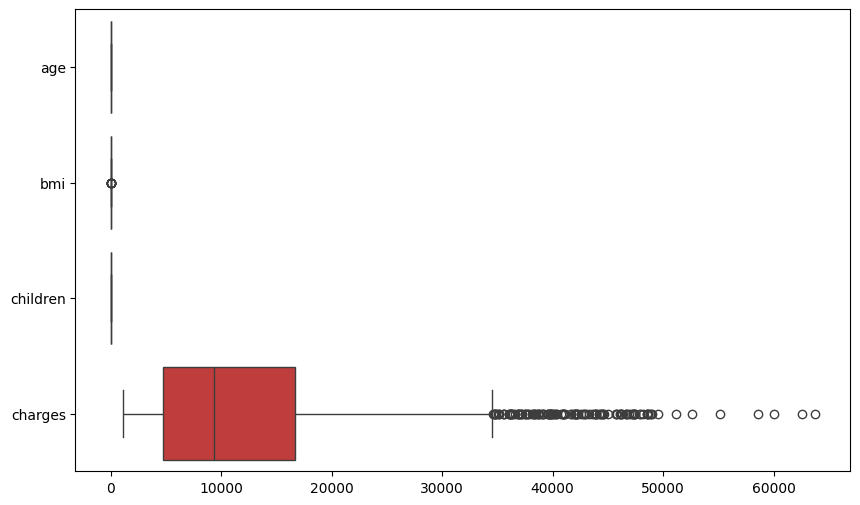

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, orient='h')
plt.show()

Transformasi

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

Normalisasi

In [ ]:
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'children','charges']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,0,-0.453160,-0.909234,1,3,0.297857
1,-1.511647,1,0.509422,-0.079442,0,2,-0.954381
2,-0.799350,1,0.383155,1.580143,0,2,-0.729373
3,-0.443201,1,-1.305052,-0.909234,0,1,0.719104
4,-0.514431,1,-0.292456,-0.909234,0,1,-0.777499


In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,-1.440418,0,-0.453160,-0.909234,1,3,0.297857
1,-1.511647,1,0.509422,-0.079442,0,2,-0.954381
2,-0.799350,1,0.383155,1.580143,0,2,-0.729373
3,-0.443201,1,-1.305052,-0.909234,0,1,0.719104
4,-0.514431,1,-0.292456,-0.909234,0,1,-0.777499
...,...,...,...,...,...,...,...
1333,0.767704,1,0.050269,1.580143,0,1,-0.221263
1334,-1.511647,0,0.206053,-0.909234,0,0,-0.914695
1335,-1.511647,0,1.014490,-0.909234,0,2,-0.962287
1336,-1.297958,0,-0.797524,-0.909234,0,3,-0.931054


Dimensionality Reduction

In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1.337000e+03,1337.000000,1.337000e+03,1.337000e+03,1337.000000,1337.000000,1.337000e+03
mean,-6.643070e-17,0.504862,-2.285216e-16,3.852980e-17,0.204936,1.516081,-1.009747e-16
std,1.000374e+00,0.500163,1.000374e+00,1.000374e+00,0.403806,1.105208,1.000374e+00
min,-1.511647e+00,0.000000,-2.411119e+00,-9.092342e-01,0.000000,0.000000,-1.004247e+00
25%,-8.705798e-01,0.000000,-7.171725e-01,-9.092342e-01,0.000000,1.000000,-7.048486e-01
50%,-1.582291e-02,1.000000,-4.320166e-02,-7.944162e-02,0.000000,2.000000,-3.215773e-01
75%,8.389340e-01,1.000000,6.619260e-01,7.503509e-01,0.000000,2.000000,2.790883e-01
max,1.764921e+00,1.000000,3.684136e+00,3.239729e+00,1.000000,3.000000,4.170826e+00


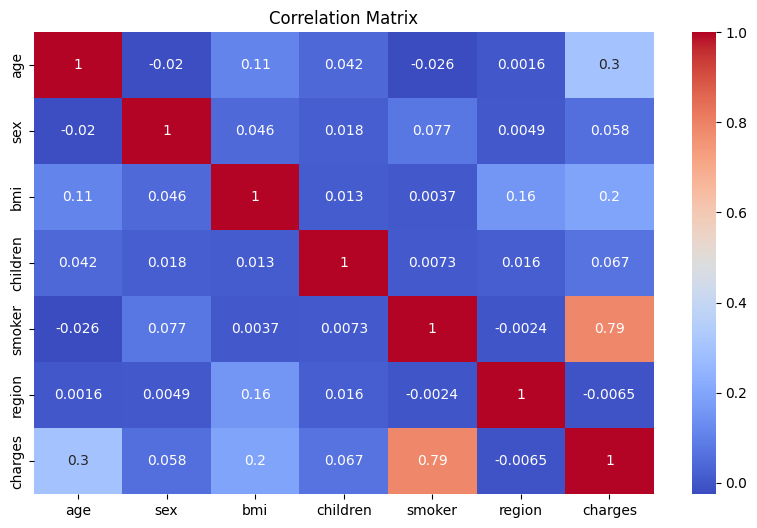

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#Visualisasi

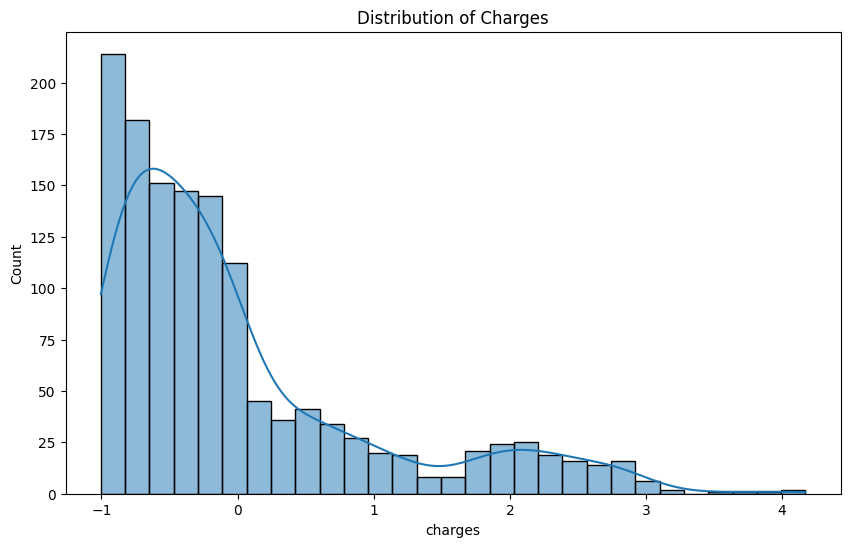

In [ ]:
# Distribusi biaya asuransi
plt.figure(figsize=(10,6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

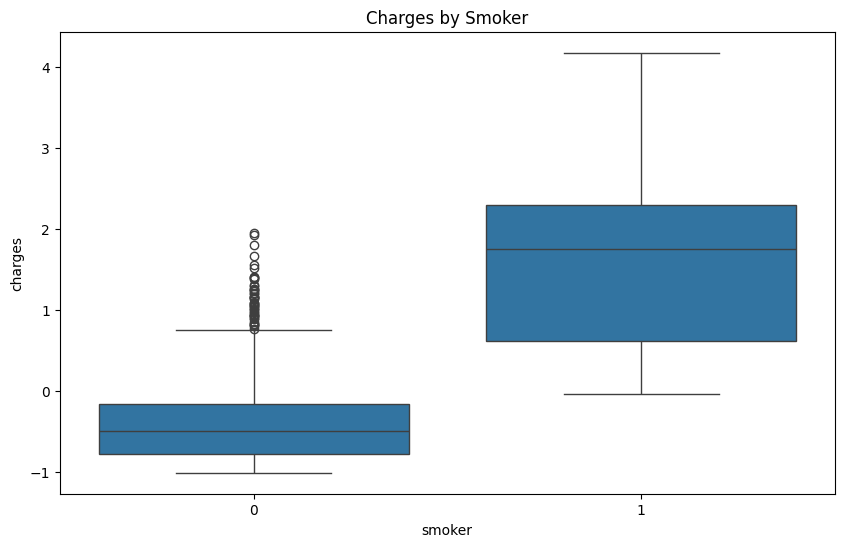

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker')
plt.show()

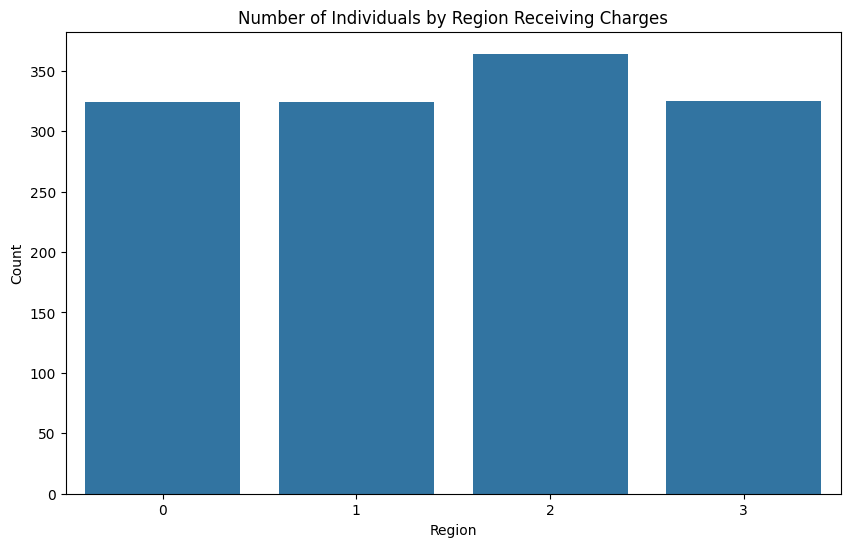

In [ ]:
region_count = df['region'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=region_count.index, y=region_count.values)
plt.title('Number of Individuals by Region Receiving Charges')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

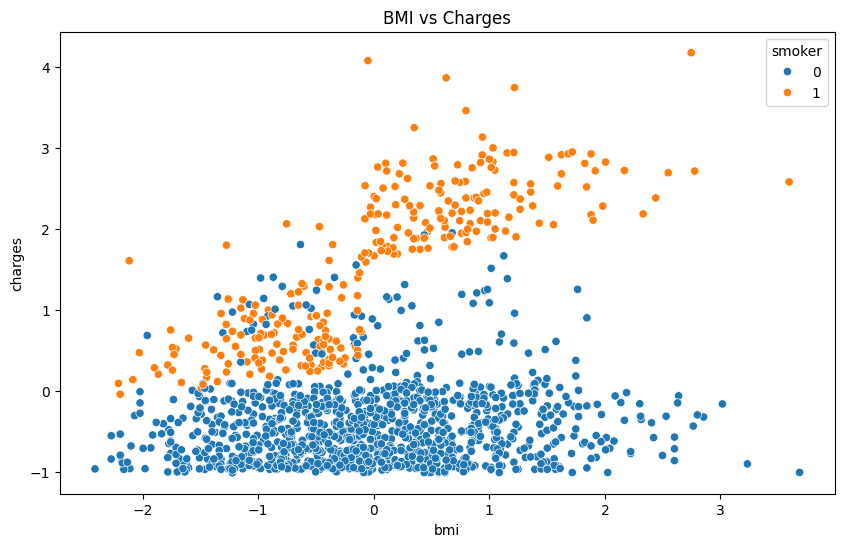

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['bmi'], y=df['charges'], hue=df['smoker'])
plt.title('BMI vs Charges')
plt.show()

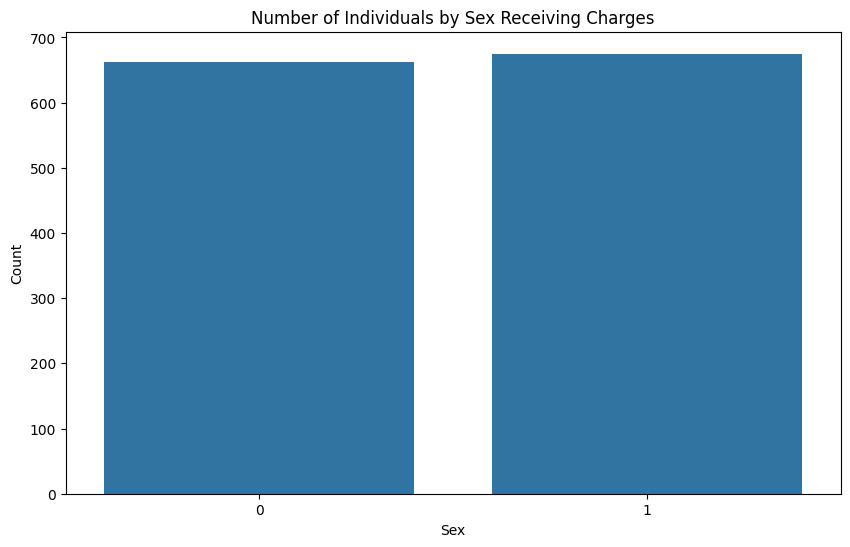

In [ ]:
sex_count = df['sex'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=sex_count.index, y=sex_count.values)
plt.title('Number of Individuals by Sex Receiving Charges')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [ ]:
# Using Z-score for anomaly detection
z_scores = stats.zscore(df['charges'])
abs_z_scores = np.abs(z_scores)
threshold = 3
outliers = df[abs_z_scores > threshold]
print("Anomalies in the dataset:\n", outliers)

Anomalies in the dataset:
            age  sex       bmi  children  smoker  region   charges
34   -0.799350    1  0.940697 -0.079442       1       3  3.131998
543   1.052623    0  2.746152 -0.909234       1       2  4.170826
577  -0.585661    0  1.218649 -0.079442       1       0  3.741334
819  -0.443201    0  0.798032 -0.909234       1       1  3.457531
1146  1.480002    1  0.350358 -0.909234       1       3  3.247337
1230  0.910164    1  0.626670  1.580143       1       1  3.861138
1300  0.411556    1 -0.049761 -0.909234       1       2  4.073554


In [ ]:
# Menghapus anomali dari dataset
df_cleaned = df[abs_z_scores <=threshold]

# Memastikan jumlah data setelah penghapusan anomali
print(f"Original data shape: {df.shape}")
print(f"Cleaned data shape: {df_cleaned.shape}")


Original data shape: (1337, 7)
Cleaned data shape: (1330, 7)


#Modeling

In [ ]:
X = df_cleaned.drop('charges', axis=1)
y = df_cleaned['charges']

In [ ]:
# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Prediksi pada data testing
y_pred_rf = model_rf.predict(X_test)

In [ ]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Squared Error: 0.159013504455764
Random Forest R-squared: 0.83437385217437


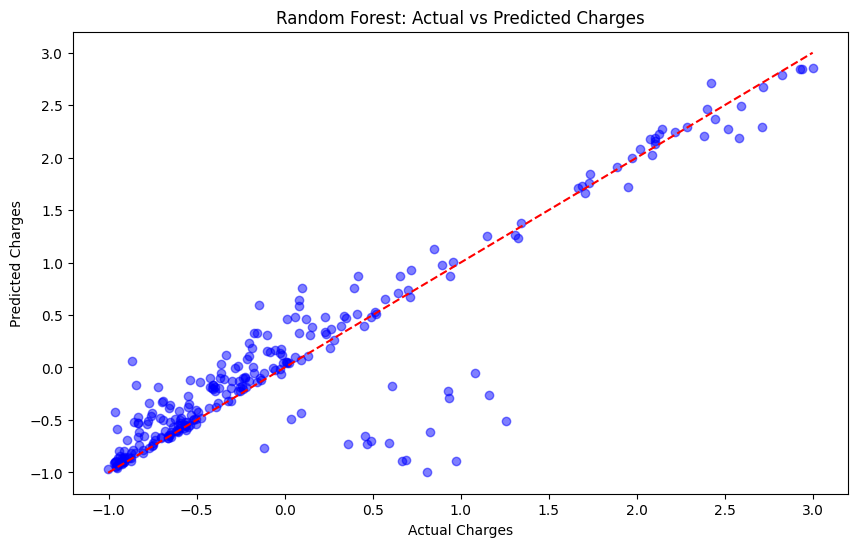

In [ ]:
# Visualisasi hasil prediksi
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest: Actual vs Predicted Charges')
plt.show()